# AUTHOR : RAJIL JAIN

# GRIP@The Sparks Foundation

# Task - 5

# Exploratory Data Analysis - Sports

Perform **'EDA'** on dataset **'Indian Premier League (IPL)'** 

In these task, We will find out the most successful teams, player and factors contributing win or loss of a team. Suggest teams or players a company should endorse for its product.  

Language:Python

IDE:Jupyter Notebook

In [4]:
#import all  relevant libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Load data of "Matches"

In [35]:
#import dataset

df=pd.read_csv("D:\Sparks Foundation\Task 5\matches.csv")
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [36]:
df.shape

(756, 18)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [38]:
df.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [39]:
df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [40]:
# Changing team names to their abbreviations

teams = {'Sunrisers Hyderabad':'SRH', 'Mumbai Indians':'MI', 'Gujarat Lions':'GL',
       'Rising Pune Supergiant':'RPS', 'Royal Challengers Bangalore':'RCB',
       'Kolkata Knight Riders':'KKR', 'Delhi Daredevils':'DC', 'Kings XI Punjab':'KXIP',
       'Chennai Super Kings':'CSK', 'Rajasthan Royals':'RR', 'Deccan Chargers':'DCH',
       'Kochi Tuskers Kerala':'KTK', 'Pune Warriors':'PW', 'Rising Pune Supergiants':'RPS',
       'Delhi Capitals':'DC'}

#Delhi capitails & Delhi daredevils both teams are same

In [41]:
df['team1'] = df['team1'].map(teams)
df['team2'] = df['team2'].map(teams)

In [42]:
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,SRH,RCB,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,MI,RPS,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,GL,KKR,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,RPS,KXIP,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,RCB,DC,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [43]:
# Total matches played in IPL till 2019

df.shape[0]

756

In [44]:
# Total venues

print(df['venue'].unique())
df['venue'].nunique()

# from nunique(), we get number of that particular operator.

['Rajiv Gandhi International Stadium, Uppal'
 'Maharashtra Cricket Association Stadium'
 'Saurashtra Cricket Association Stadium' 'Holkar Cricket Stadium'
 'M Chinnaswamy Stadium' 'Wankhede Stadium' 'Eden Gardens'
 'Feroz Shah Kotla' 'Punjab Cricket Association IS Bindra Stadium, Mohali'
 'Green Park' 'Punjab Cricket Association Stadium, Mohali'
 'Sawai Mansingh Stadium' 'MA Chidambaram Stadium, Chepauk'
 'Dr DY Patil Sports Academy' 'Newlands' "St George's Park" 'Kingsmead'
 'SuperSport Park' 'Buffalo Park' 'New Wanderers Stadium'
 'De Beers Diamond Oval' 'OUTsurance Oval' 'Brabourne Stadium'
 'Sardar Patel Stadium, Motera' 'Barabati Stadium'
 'Vidarbha Cricket Association Stadium, Jamtha'
 'Himachal Pradesh Cricket Association Stadium' 'Nehru Stadium'
 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium'
 'Subrata Roy Sahara Stadium'
 'Shaheed Veer Narayan Singh International Stadium'
 'JSCA International Stadium Complex' 'Sheikh Zayed Stadium'
 'Sharjah Cricket Stadium' 'Dubai Inte

41

In [45]:
# Cities where tournament played in past year 

print(df['city'].unique())
df['city'].nunique()

['Hyderabad' 'Pune' 'Rajkot' 'Indore' 'Bangalore' 'Mumbai' 'Kolkata'
 'Delhi' 'Chandigarh' 'Kanpur' 'Jaipur' 'Chennai' 'Cape Town'
 'Port Elizabeth' 'Durban' 'Centurion' 'East London' 'Johannesburg'
 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur' 'Dharamsala'
 'Kochi' 'Visakhapatnam' 'Raipur' 'Ranchi' 'Abu Dhabi' 'Sharjah' nan
 'Mohali' 'Bengaluru']


32

## Finding venue hosted most IPL matches played 

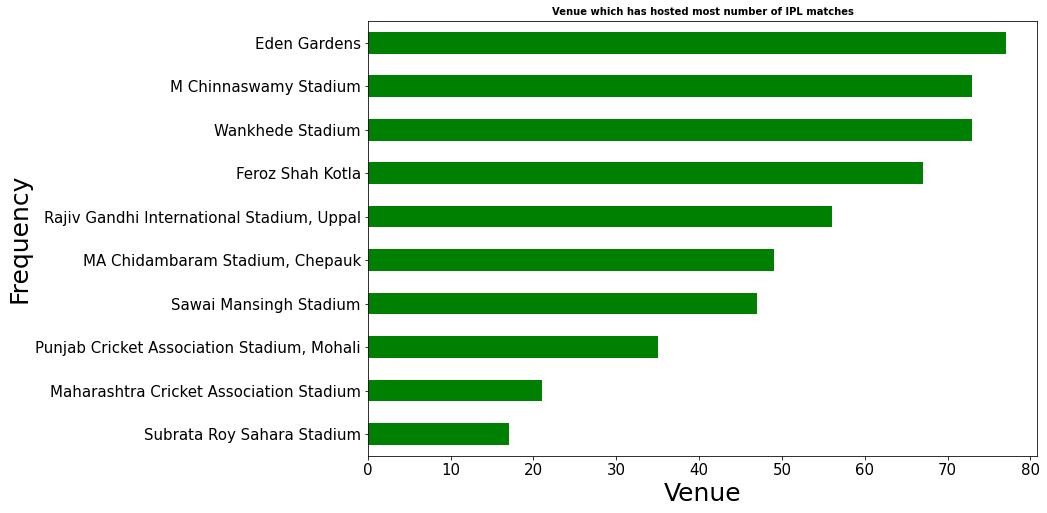

In [107]:
df.venue.value_counts().sort_values(ascending=True).tail(10).plot(kind='barh',figsize=(12,8),fontsize=15,color='green')
plt.title('Venue which has hosted most number of IPL matches',fontsize=10,fontweight='bold')
plt.xlabel('Venue',size=25)
plt.ylabel('Frequency',size=25)
plt.show()

In [46]:
# Total teams in IPL

print(df['team1'].unique())
df['team1'].nunique()

['SRH' 'MI' 'GL' 'RPS' 'RCB' 'KKR' 'DC' 'KXIP' 'CSK' 'RR' 'DCH' 'KTK' 'PW']


13

In [47]:
# Most Man of the Match(MOM) awards

MOM = df['player_of_match'].value_counts().head()
MOM

CH Gayle          21
AB de Villiers    20
DA Warner         17
MS Dhoni          17
RG Sharma         17
Name: player_of_match, dtype: int64

In [48]:
# Total match played across each season

df['season'].value_counts()

2013    76
2012    74
2011    73
2010    60
2014    60
2016    60
2018    60
2019    60
2015    59
2017    59
2008    58
2009    57
Name: season, dtype: int64

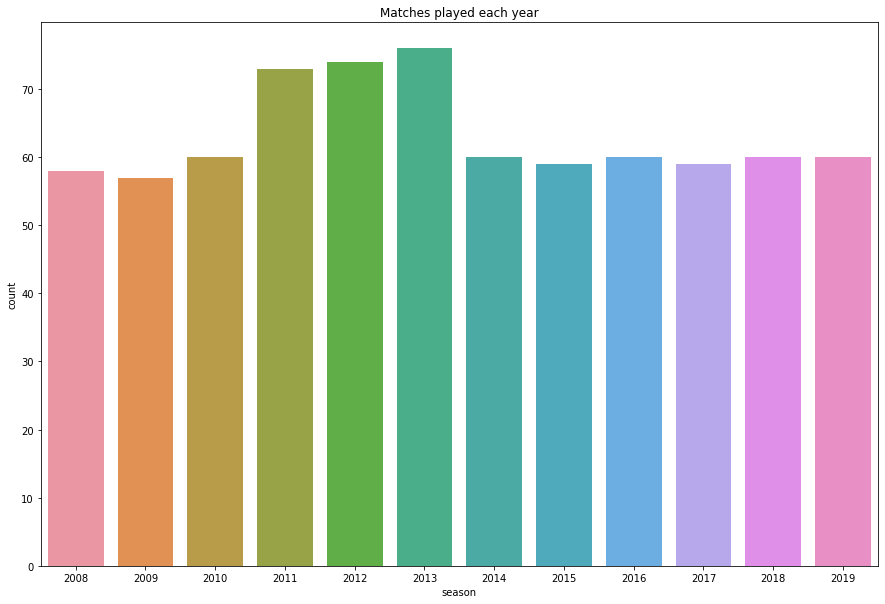

In [105]:
plt.figure(figsize=(15,10))
sns.countplot(df['season'])
plt.title('Matches played each year')
plt.show()

In [50]:
# Toss decisions made across all seasons

df.groupby('season')['toss_decision'].value_counts()

season  toss_decision
2008    field            32
        bat              26
2009    bat              35
        field            22
2010    bat              39
        field            21
2011    field            48
        bat              25
2012    bat              37
        field            37
2013    bat              45
        field            31
2014    field            41
        bat              19
2015    field            34
        bat              25
2016    field            49
        bat              11
2017    field            48
        bat              11
2018    field            50
        bat              10
2019    field            50
        bat              10
Name: toss_decision, dtype: int64

From above info, 


we found that **Maximum number of toss decision** made for **field** also particularly of season played in 2019 year.

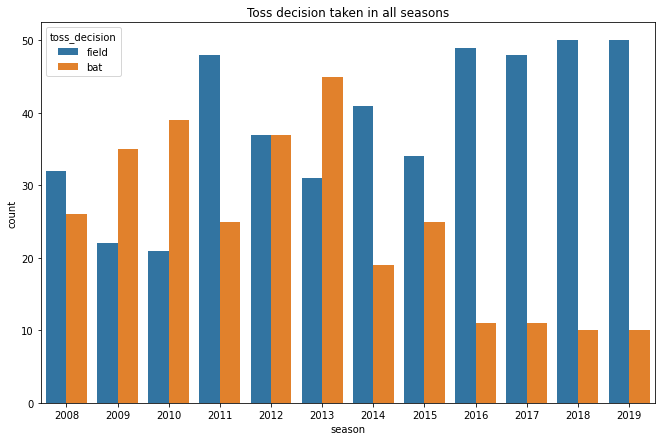

In [51]:
plt.figure(figsize=(11,7))
sns.countplot(df['season'],hue=df['toss_decision'])
plt.title('Toss decision taken in all seasons')
plt.show()

In [52]:
# Total matches played by each team

total_matches = ((df['team1']).value_counts()+(df['team2']).value_counts()).reset_index()
total_matches.columns = ['team_name','matches_played']
total_matches.sort_values('matches_played',ascending = False)


,team_name,matches_played
7,MI,187
9,RCB,180
4,KKR,178
1,DC,177
6,KXIP,176
0,CSK,164
11,RR,147
12,SRH,108
2,DCH,75
8,PW,46


In [53]:
# Most winning teams 

df['winner'] = df['winner'].map(teams)
winner = df['winner'].value_counts().reset_index()
winner.columns = ['team_name','wins']
winner.sort_values('wins',ascending=False)
winner

,team_name,wins
0,MI,109
1,CSK,100
2,KKR,92
3,RCB,84
4,KXIP,82
5,DC,77
6,RR,75
7,SRH,58
8,DCH,29
9,RPS,15


In [54]:
# Matches played VS matches wins

result = total_matches.merge(winner,left_on = 'team_name',right_on = 'team_name',how = 'inner')
result.sort_values('wins',ascending=False)

,team_name,matches_played,wins
7,MI,187,109
0,CSK,164,100
4,KKR,178,92
9,RCB,180,84
6,KXIP,176,82
1,DC,177,77
11,RR,147,75
12,SRH,108,58
2,DCH,75,29
10,RPS,30,15


In [55]:
result['%win'] = (result['wins']/result['matches_played'])*100
result.sort_values('%win',ascending=False)

,team_name,matches_played,wins,%win
0,CSK,164,100,60.975610
7,MI,187,109,58.288770
12,SRH,108,58,53.703704
4,KKR,178,92,51.685393
11,RR,147,75,51.020408
10,RPS,30,15,50.000000
9,RCB,180,84,46.666667
6,KXIP,176,82,46.590909
1,DC,177,77,43.502825
3,GL,30,13,43.333333


 From above info, 
 
 we can say that Mumbai Indians(MI) wins the most number of matches (109) but Chennai Super Kings(CSK) has highest %win also
 
 more Fanbase holds to same teams on top of table like **MI and CSK** has more number of followings because of their game and 
 
 this insight justify companies to **endores** the team and player of that specific team.    

# Finding does toss decision affect the winning the match

In [56]:
# Maximum toss winner team

df['toss_winner'] = df['toss_winner'].map(teams)
toss_winner = df['toss_winner'].value_counts().reset_index()
toss_winner.columns = ['team_name','toss_wins']
toss_winner.head()

,team_name,toss_wins
0,MI,98
1,KKR,92
2,DC,90
3,CSK,89
4,RCB,81


In [59]:
toss_win = total_matches.merge(toss_winner,left_on = 'team_name', right_on = 'team_name',how = 'inner')
toss_win.sort_values('toss_wins',ascending = False).head()

,team_name,matches_played,toss_wins
7,MI,187,98
4,KKR,178,92
1,DC,177,90
0,CSK,164,89
6,KXIP,176,81


In [60]:
df['toss_decision'].value_counts()

field    463
bat      293
Name: toss_decision, dtype: int64

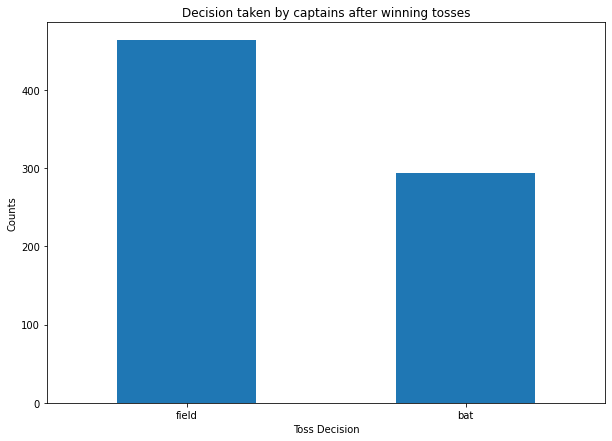

In [118]:
df['toss_decision'].value_counts().plot(kind='bar',figsize=(10,7))
plt.xlabel('Toss Decision')
plt.ylabel('Counts')
plt.xticks(rotation=360)
plt.title('Decision taken by captains after winning tosses')
plt.show()

In [61]:
bat_first = df[df['toss_decision'] == 'bat'].reset_index()
bat_first.head(3)

,index,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,4,5,2017,Bangalore,2017-04-08,RCB,DC,RCB,bat,normal,0,RCB,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
1,7,8,2017,Indore,2017-04-10,RCB,KXIP,RCB,bat,normal,0,KXIP,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
2,14,15,2017,Delhi,2017-04-15,DC,KXIP,DC,bat,normal,0,DC,51,0,CJ Anderson,Feroz Shah Kotla,YC Barde,Nitin Menon,NaN


In [62]:
bat_first.shape

(293, 19)

In [64]:
print('While batting first teams won:',(bat_first['win_by_runs'] > 1).sum(),'matches')

While batting first teams won: 131 matches


In [65]:
print('While batting first teams lost:',(bat_first['win_by_wickets'] > 1).sum(),'matches')

While batting first teams lost: 152 matches


In [66]:
field_first = df[df['toss_decision']=='field'].reset_index()
field_first.head(3)

,index,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,0,1,2017,Hyderabad,2017-04-05,SRH,RCB,RCB,field,normal,0,SRH,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,1,2,2017,Pune,2017-04-06,MI,RPS,RPS,field,normal,0,RPS,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,2,3,2017,Rajkot,2017-04-07,GL,KKR,KKR,field,normal,0,KKR,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN


In [67]:
field_first.shape

(463, 19)

In [68]:
print('While bowling first teams won:',(field_first['win_by_wickets'] > 1).sum(),'matches')

While bowling first teams won: 251 matches


In [69]:
print('While bowling first teams lost:',(field_first['win_by_runs'] > 1).sum(),'matches')

While bowling first teams lost: 196 matches


# Finding does playing ground affect the loss or win of team

In [70]:
def ground(df,team_name):
    return df[df['winner']==team_name]['venue'].value_counts().head()

In [71]:
ground(df,'MI')

Wankhede Stadium              42
Eden Gardens                  10
M Chinnaswamy Stadium          8
Brabourne Stadium              6
Dr DY Patil Sports Academy     5
Name: venue, dtype: int64

In [72]:
ground(df,'RCB')

M Chinnaswamy Stadium    34
Feroz Shah Kotla          6
Eden Gardens              4
Wankhede Stadium          3
New Wanderers Stadium     3
Name: venue, dtype: int64

In [73]:
ground(df,'CSK')

MA Chidambaram Stadium, Chepauk    34
Wankhede Stadium                    7
M. A. Chidambaram Stadium           6
Feroz Shah Kotla                    5
M Chinnaswamy Stadium               5
Name: venue, dtype: int64

From above, we can say that ground can affect the win/loss of the team.
And teams perform well at their home ground. 

# Load the data of "deliveries"

In [75]:
df2 = pd.read_csv('D:\Sparks Foundation\Task 5\deliveries.csv')
df2.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [76]:
df2['batting_team']=df2['batting_team'].map(teams)
df2['bowling_team']=df2['bowling_team'].map(teams)

In [77]:
df2.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,SRH,RCB,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,SRH,RCB,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,SRH,RCB,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,SRH,RCB,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,SRH,RCB,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


## Top 10 Batsman

In [80]:
top_batsman = df2.groupby('batsman')['total_runs'].sum()
top_batsman.sort_values(ascending = False).head(10)

batsman
SK Raina          5651
V Kohli           5616
RG Sharma         5057
DA Warner         4975
S Dhawan          4876
CH Gayle          4873
RV Uthappa        4703
MS Dhoni          4691
AB de Villiers    4583
G Gambhir         4485
Name: total_runs, dtype: int64

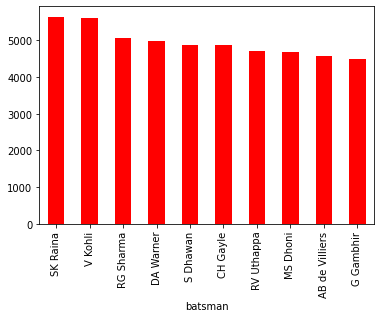

In [85]:
top_batsman.sort_values(ascending = False).head(10).plot(kind='bar',color = 'red')
plt.show()

These players are most successful batsman of IPL and companies more likely endores them. 

## Top highest individual score of batsman

In [87]:
df2.groupby(['match_id','batsman','batting_team'])['batsman_runs'].sum().reset_index().sort_values('batsman_runs',
ascending = False).head(10)

,match_id,batsman,batting_team,batsman_runs
6200,411,CH Gayle,RCB,175
900,60,BB McCullum,KKR,158
8426,562,AB de Villiers,RCB,133
10149,7935,RR Pant,DC,130
9257,620,AB de Villiers,RCB,129
5585,372,CH Gayle,RCB,128
3135,206,M Vijay,CSK,127
529,36,DA Warner,SRH,126
7752,516,V Sehwag,KXIP,122
10417,7953,SR Watson,CSK,121


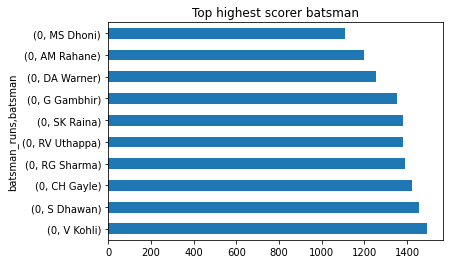

In [187]:
df2.groupby('batsman_runs')['batsman'].value_counts()[:10].plot(kind='barh')
plt.title('Top highest scorer batsman')
plt.show()

## Highest wicket taken by player

In [89]:
df2['dismissal_kind'].unique()

array([nan, 'caught', 'bowled', 'run out', 'lbw', 'caught and bowled',
       'stumped', 'retired hurt', 'hit wicket', 'obstructing the field'],
      dtype=object)

In [90]:
# This dismissal ways only considered as bowler's wicket.

dismissal_kinds = ['caught','bowled','lbw','caught and bowled','stumped','hit wicket']

In [91]:
highest_wicket = df2[df2['dismissal_kind'].isin(dismissal_kinds)]
highest_wicket.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
11,1,1,SRH,RCB,2,5,DA Warner,S Dhawan,A Choudhary,0,...,0,0,0,0,0,0,0,DA Warner,caught,Mandeep Singh
64,1,1,SRH,RCB,11,3,S Dhawan,MC Henriques,STR Binny,0,...,0,0,0,0,0,0,0,S Dhawan,caught,Sachin Baby
94,1,1,SRH,RCB,16,2,MC Henriques,Yuvraj Singh,YS Chahal,0,...,0,0,0,0,0,0,0,MC Henriques,caught,Sachin Baby
116,1,1,SRH,RCB,19,4,Yuvraj Singh,DJ Hooda,TS Mills,0,...,0,0,0,0,0,0,0,Yuvraj Singh,bowled,NaN
160,1,2,RCB,SRH,6,4,Mandeep Singh,CH Gayle,Rashid Khan,0,...,0,0,0,0,0,0,0,Mandeep Singh,bowled,NaN


In [93]:
highest_wicket['bowler'].value_counts().head(10)

SL Malinga         170
A Mishra           156
Harbhajan Singh    150
PP Chawla          149
DJ Bravo           147
B Kumar            133
R Ashwin           125
SP Narine          122
UT Yadav           119
RA Jadeja          108
Name: bowler, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

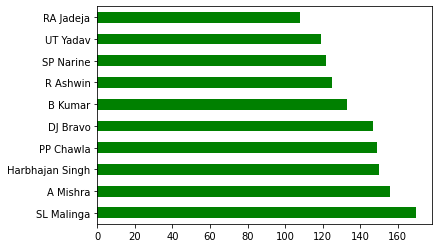

In [119]:
highest_wicket['bowler'].value_counts().head(10).plot(kind='barh',color ='green')
plt.show

## Highest wicket taken by player in single match

In [103]:
best_bowling = highest_wicket.groupby(['match_id','bowler','bowling_team','batting_team'])['dismissal_kind'].count().reset_index().sort_values('dismissal_kind',ascending=False).head(10)
best_bowling.rename(columns = {'dismissal_kind':'wickets'})

,match_id,bowler,bowling_team,batting_team,wickets
579,83,Sohail Tanvir,RR,CSK,6
4782,11310,A Joseph,MI,SRH,6
4109,616,A Zampa,RPS,SRH,6
795,119,A Kumble,RCB,RR,5
2103,313,RA Jadeja,CSK,DCH,5
84,13,AJ Tye,GL,RPS,5
1731,257,Harbhajan Singh,MI,CSK,5
625,91,L Balaji,CSK,KXIP,5
299,43,JD Unadkat,RPS,SRH,5
134,19,B Kumar,SRH,KXIP,5


# Conclusion

From above Exploratory Data Analysis on **IPL** dataset, we can conclude that:
    
    1.CSK is most successful team of Indian Premier League (with highest %win of 61%) & MI is second on board.
    
    2.Mahendra Singh Dhoni is most successful captain of IPL.
    
    3.Toss result & ground can affects the win/loss of team.
    
    4.SK Raina(5651),V Kohli(5616),RG Sharma(5057) are top three batsman(all are indian citizen)
    
    5.SL Malinga(170),A Mishra(156),Harbajan Singh(150) are top three highest wicket takers of IPL.
    

Thank You